项目根目录已添加到Python路径: c:\Users\29729\OneDrive\文档\python软件开发实践\telco_churn_analysis
开始进行初步数据探索...
数据已成功从 'c:\Users\29729\OneDrive\文档\python软件开发实践\telco_churn_analysis\data\raw\telco_customer_churn.csv' 加载。

--- 数据概览 ---
数据集形状 (行, 列): (7043, 21)

数据集前5行:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



数据集基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



分类型特征的描述性统计:


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174



--- 缺失值检查 ---
数据集中没有缺失值。

--- 检查 'TotalCharges' 列 ---
'TotalCharges' 列中发现 11 个缺失值 (可能由空字符串转换而来)。

--- 目标变量 'Churn' 分布 ---


,Count,Percentage (%)
Churn,,
No,5174,73.463013
Yes,1869,26.536987


C:\Users\29729\AppData\Local\Temp\ipykernel_105856\117329107.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=TARGET_COLUMN, data=df, palette='viridis')


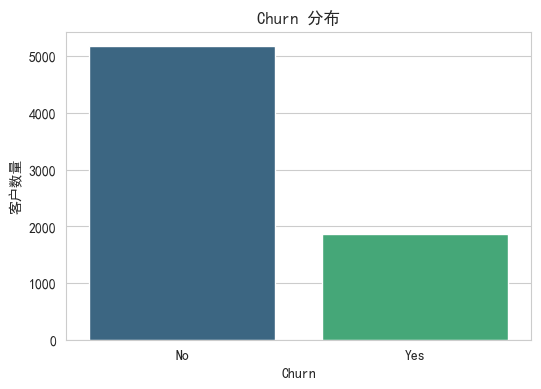


初步数据探索完成。


In [ ]:
# notebooks/1.0-EDA-Initial-Analysis.ipynb初步加载数据并进行概览性分析

# 导入所需库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 添加项目根目录到Python路径
import sys
import os
# 获取当前文件所在的目录路径
current_dir = os.path.dirname(os.path.abspath('__file__'))
# 获取项目根目录路径
project_root = os.path.abspath(os.path.join(current_dir, '..'))
# 添加项目根目录到Python路径
sys.path.append(project_root)
print(f"项目根目录已添加到Python路径: {project_root}")

# 导入自定义模块
from src.data_loader import load_data
from src.config import RAW_DATA_PATH, TARGET_COLUMN

# 设置图表风格
sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用于显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

print("开始进行初步数据探索...")

# 1. 加载数据
df = load_data(RAW_DATA_PATH)

if df is not None:
    print("\n--- 数据概览 ---")
    print(f"数据集形状 (行, 列): {df.shape}")
    print("\n数据集前5行:")
    display(df.head())

    print("\n数据集基本信息:")
    df.info()

    print("\n数值型特征的描述性统计:")
    display(df.describe())

    print("\n分类型特征的描述性统计:")
    display(df.describe(include='object'))

    print("\n--- 缺失值检查 ---")
    missing_values = df.isnull().sum()
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    missing_df = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage (%)': missing_percentage})
    # 只显示存在缺失值的列，并按缺失数量排序
    missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)
    if not missing_df.empty:
        print("存在缺失值的列:")
        display(missing_df)
    else:
        print("数据集中没有缺失值。")

    # 检查 TotalCharges 列的特殊情况（可能是空格而不是NaN）
    print("\n--- 检查 'TotalCharges' 列 ---")
    # 很多情况下TotalCharges中包含空字符串，需要将其转换为数值
    # 首先替换空格为NaN
    df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
    # 再次检查缺失值，以捕获 TotalCharges 中可能出现的空格
    total_charges_missing = df['TotalCharges'].isnull().sum()
    if total_charges_missing > 0:
        print(f"'TotalCharges' 列中发现 {total_charges_missing} 个缺失值 (可能由空字符串转换而来)。")
    else:
        print("'TotalCharges' 列没有发现由空字符串导致的缺失值。")

    # 检查目标变量分布
    print(f"\n--- 目标变量 '{TARGET_COLUMN}' 分布 ---")
    churn_counts = df[TARGET_COLUMN].value_counts() # 计算每个类别的数量
    churn_percentages = df[TARGET_COLUMN].value_counts(normalize=True) * 100
    churn_distribution = pd.DataFrame({'Count': churn_counts, 'Percentage (%)': churn_percentages})
    display(churn_distribution)

    # 可视化目标变量分布
    plt.figure(figsize=(6, 4))
    sns.countplot(x=TARGET_COLUMN, data=df, palette='viridis')
    plt.title(f'{TARGET_COLUMN} 分布')
    plt.xlabel(TARGET_COLUMN)
    plt.ylabel('客户数量')
    plt.show()

else:
    print("未能加载数据，请检查路径和文件是否存在。")

print("\n初步数据探索完成。")